In [2]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import matplotlib 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import sys, os
root = os.path.join(os.getcwd(), '../')
sys.path.append(root)

INPUT_FILE = os.path.join(root,'templates/sectormagnet/gpt.in')

In [1]:
from gpt import GPT
G = GPT(input_file=INPUT_FILE, verbose=True)

NameError: name 'INPUT_FILE' is not defined

In [4]:
G.run()
print(G)

GPT.run_gpt:
   Running GPT...
   Writing gpt input file to "/var/folders/t8/f3n1sdnn1jg0wfbpqfm1hsh80000gn/T/tmpyii7th9k/gpt.in"

General Particle Tracer - Oct 28 2014
Run Aborted: Command '['/Users/colwyngulliford/Documents/GitHub/xgpt/gpt321MacOSX/bin/gpt', '-j1', '-v', '-o', '/var/folders/t8/f3n1sdnn1jg0wfbpqfm1hsh80000gn/T/tmpyii7th9k/gpt.out.gdf', '/var/folders/t8/f3n1sdnn1jg0wfbpqfm1hsh80000gn/T/tmpyii7th9k/gpt.in']' returned non-zero exit status 1.
   Run finished, total time ellapsed: 0.0317791 (sec)

GPT object:
   Original input file: gpt.in
   Template location: /Users/colwyngulliford/Documents/GitHub/lume-gpt/templates/sectormagnet
   Use temp directory: True

Run Control
   Run configured: True
   Work location: /var/folders/t8/f3n1sdnn1jg0wfbpqfm1hsh80000gn/T/tmpyii7th9k
   Timeout: None (sec)

Results
   Finished: True
   Error occured: True
   Cause: Command '['/Users/colwyngulliford/Documents/GitHub/xgpt/gpt321MacOSX/bin/gpt', '-j1', '-v', '-o', '/var/folders/t8/f3n1s

particle id = 25, mean x pos = -0.001
particle id = 67, mean x pos = 0.001


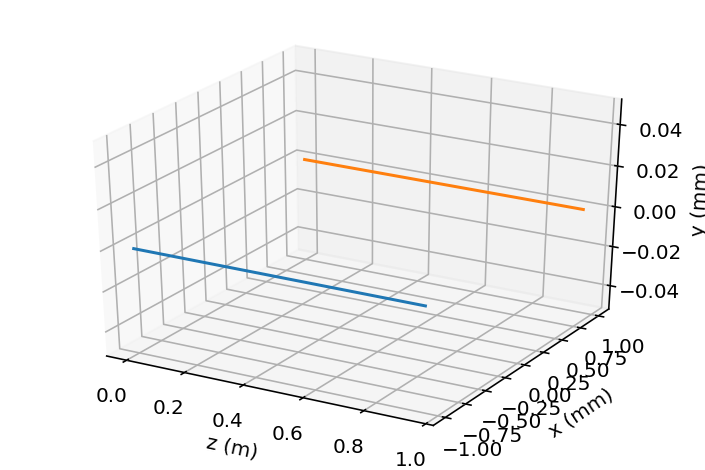

In [57]:
from mpl_toolkits.mplot3d import Axes3D

t1 = G.trajectory(1, data_type='tout')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

legend = []

for ii in range(0,70):
    
    tii = G.trajectory(ii, data_type='tout')
    if(tii):
        ax.plot(tii['x']*1000, tii['y']*1000, tii['z'], zdir='x')
        print(f'particle id = {ii},', f'mean x pos = {tii["x"].mean()}')

ax.set_xlabel('z (m)');
ax.set_ylabel('x (mm)');
ax.set_zlabel('y (mm)');

In [56]:
for tout in G.tout:
    print(tout['id'])

[25. 67.]
[25. 67.]
[25. 67.]
[25. 67.]
[25. 67.]
[25. 67.]
[25. 67.]
[25. 67.]
[25. 67.]
[25. 67.]
[25. 67.]
[25. 67.]
[25. 67.]
[25. 67.]
[25. 67.]
[25. 67.]
[25. 67.]
